In [37]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset


In [38]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

hi5


y = [0], it's a 'non-cat' picture.


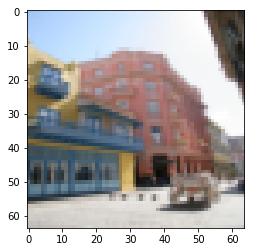

In [39]:
index = 23
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


In [40]:
m_train = train_set_x_orig.shape [0]
print("valores de entrenamiento: "+ str(m_train))
m_test = test_set_x_orig.shape [0]
print("valores de prueba: "+ str(m_test))
num_px = train_set_x_orig.shape [1]
print("tamaño: "+ str(num_px) +"*"+ str(num_px))

valores de entrenamiento: 209
valores de prueba: 50
tamaño: 64*64


In [41]:
train_set_X_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
print("reShape set train: "+ str(train_set_X_flatten.shape))
test_set_X_flatten =test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print("reShape set test: "+ str(test_set_X_flatten.shape))

reShape set train: (12288, 209)
reShape set test: (12288, 50)


In [42]:
train_set_x = train_set_X_flatten/255.
print("train/255, valores: "+ str(len(train_set_x)))
test_set_x = test_set_X_flatten/255.
print("test/255, valores: "+ str(len(test_set_x)))

train/255, valores: 12288
test/255, valores: 12288


In [43]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b
cantidad = 5
w,b= initialize_with_zeros(cantidad)
print(w)
print(b)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0


In [44]:
def sigmoid(z):
    s = 1 / ( 1 + np.exp(-z))
    return s

prueba= np.array([4])
print(sigmoid(prueba))

[0.98201379]


In [45]:
def propagate(w,b,X,Y):
    m =X.shape[1]
    #Forward propagation
    A = sigmoid(np.dot((w.T),X) + b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    #Backward propagation
    dw = (1/m)*(np.dot(X,(A-Y).T))
    db = (1/m)*(np.sum(A-Y))
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    return grads, cost
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [58]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        #Recuperar las derivadas de grads
        dw = grads["dw"]
        db = grads["db"]
        #Actualizar pesos
        w= w - learning_rate*dw
        b= b - learning_rate*db
        #Record the costs
        if i % 100 == 0:
            costs.append(cost)
        #Print the cost every 100 training iterations
        if print_cost and i%100 ==0:
            print("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w":w, "b":b}
    grads = {"dw": dw, "db":db}
    return params, grads, costs
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("costs: {} %".format(100 - np.mean(np.abs(costs)) * 100))

w = [[-0.08608643]
 [ 0.10971233]]
b = -0.1442742664803268
dw = [[0.12311093]
 [0.13629247]]
db = -0.14923915884638042
costs: 19.226436622875838 %


In [47]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
            
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [59]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))
print("costs: {} %".format(100 - np.mean(np.abs(costs)) * 100))

predictions = [[1. 1. 0.]]
costs: 19.226436622875838 %


In [61]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs =  optimize(w, b, X_train, Y_train, num_iterations= 2000, learning_rate = 0.5, print_cost = False)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("costs: {} %".format(100 - np.mean(np.abs(costs)) * 100))

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
print("costs: {} %".format(100 - np.mean(np.abs(costs)) * 100))

C:\Users\JEZRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\JEZRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


costs: nan %
train accuracy: 100.0 %
test accuracy: 72.0 %
costs: 19.226436622875838 %


costs: nan %


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

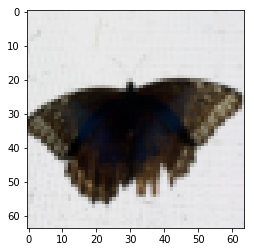

In [72]:
index = 13
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print("costs: {} %".format(100 - np.mean(np.abs(costs)) * 100)) ##Hay un error aquí, no plotea costs porque aquí no tiene datos
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")
# El error está en: classes[d["Y_prediction_test"][0,index]].decode("utf-8")

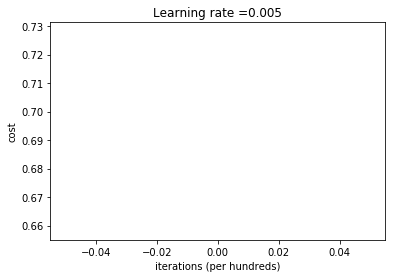

costs: nan %


In [63]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
print("costs: {} %".format(100 - np.mean(np.abs(costs)) * 100))


learning rate is: 0.01


C:\Users\JEZRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\JEZRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


train accuracy: 100.0 %
test accuracy: 72.0 %
learning rate is: 0.001
train accuracy: 100.0 %
test accuracy: 72.0 %
learning rate is: 0.0001
train accuracy: 100.0 %
test accuracy: 72.0 %

-------------------------------------------------------



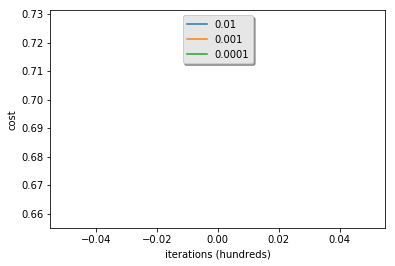

In [53]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
